In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [34]:
df=pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [35]:
X=df.iloc[:,[2,3]].values
y=df.iloc[:,4]
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score
from mlxtend.plotting import plot_confusion_matrix

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [23]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [24]:
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [25]:
y_pred=classifier.predict(X_test)
print(y_pred)
print("*"*16)
print(X_test)

[0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 1 0]
****************
[[-0.56234407  1.31818327]
 [ 1.88263014  1.46412685]
 [-0.26894716 -0.63746071]
 [-1.63813272  0.4717105 ]
 [-1.34473581 -0.40395098]
 [-0.95353994 -0.49151713]
 [ 0.90464046 -1.10448017]
 [-0.07334923 -1.13366889]
 [ 1.6870322   1.551693  ]
 [ 0.90464046 -1.36717862]
 [ 0.02444974 -0.31638483]
 [ 0.22004768 -0.4331397 ]
 [ 0.90464046 -0.608272  ]
 [ 1.10023839  0.50089922]
 [ 0.31784665  0.00469104]
 [ 0.70904252 -1.45474477]
 [ 0.02444974 -0.31638483]
 [-0.26894716  0.00469104]
 [-0.26894716  0.4717105 ]
 [ 0.70904252 -0.78340429]
 [-1.73593168  0.41333307]
 [ 2.07822807  0.12144591]
 [ 0.41564561 -0.19962997]
 [-0.66014303 -1.65906578]
 [-1.83373065 -1.54231091]
 [-1.44253478 -0.69583814]
 [ 0.12224871  0.03387976]
 [-1.3447

In [37]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[78  6]
 [12 24]]


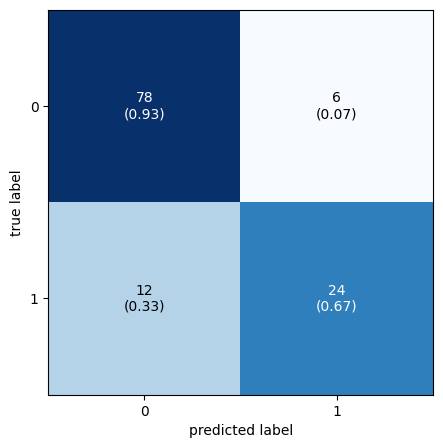

In [27]:
plot_confusion_matrix(conf_mat=cm,figsize=[5,5],show_normed=True)
plt.show()

In [28]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

In [29]:
print("TN:",TN)
print("FP:",FP)
print("FN:",FN)
print("TP:",TP)

TN: 78
FP: 6
FN: 12
TP: 24


In [30]:
accuracy=accuracy_score(y_test,y_pred)
error_rate=1-accuracy
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [31]:
print("Accuracy:",accuracy)
print("Error_Rate:",error_rate)
print("Precision:",precision)
print("Recall:",recall)
print("F1:",f1_score)

Accuracy: 0.85
Error_Rate: 0.15000000000000002
Precision: 0.8
Recall: 0.6666666666666666
F1: <function f1_score at 0x000002933FECEE80>


In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        84
           1       0.80      0.67      0.73        36

    accuracy                           0.85       120
   macro avg       0.83      0.80      0.81       120
weighted avg       0.85      0.85      0.85       120

